# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 1.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
166416,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0317,0.0024,0.0073,8,0,8,8
225180,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0049,0.0708,0.0024,0.0513,8,0,15,15
374590,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0220,0.0708,0.1172,0.0024,0,0,0,0
119851,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0098,0.0024,0.0024,3,0,3,3
465833,0.3442,0.1538,0.0024,0.0024,0.0269,0.0024,0.3052,1.3354,0.1416,0.0024,4,4,23,23


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471483 entries, 0 to 471482
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          471483 non-null  float64
 1   Emg2          471483 non-null  float64
 2   Emg3          471483 non-null  float64
 3   Emg4          471483 non-null  float64
 4   Emg5          471483 non-null  float64
 5   Emg6          471483 non-null  float64
 6   Emg7          471483 non-null  float64
 7   Emg8          471483 non-null  float64
 8   Emg9          471483 non-null  float64
 9   Emg10         471483 non-null  float64
 10  repetition    471483 non-null  int64  
 11  rerepetition  471483 non-null  int64  
 12  stimulus      471483 non-null  int64  
 13  restimulus    471483 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.4 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000
mean,0.129657,0.122672,0.123409,0.044321,0.012722,0.014612,0.221796,0.233414,0.107259,0.072334,3.136047,2.113255,5.562892,4.570513
std,0.286859,0.322911,0.337717,0.167680,0.032359,0.042109,0.476014,0.353467,0.233386,0.156993,3.480664,3.212682,6.575838,6.427040
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.012200,0.063500,0.002400,0.009800,0.000000,0.000000,0.000000,0.000000
50%,0.017100,0.002400,0.002400,0.002400,0.002400,0.002400,0.051300,0.112300,0.007300,0.039100,2.000000,0.000000,3.000000,0.000000
75%,0.114700,0.046400,0.058600,0.007300,0.002400,0.002400,0.190400,0.244100,0.136700,0.065900,6.000000,4.000000,10.000000,9.000000
max,4.665500,4.663100,4.658200,4.663100,0.876500,1.484400,4.663100,4.665500,4.660600,4.628900,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     202625
2      15538
12     15532
8      15531
7      15518
4      15516
11     15514
5      15492
9      15492
10     15477
1      15476
3      15469
6      15469
14     10361
13     10360
17     10346
15     10334
16     10320
18      5210
20      5202
19      5189
21      5185
23      5166
22      5161
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.273175,-0.420358,-0.402043,-0.277718,-0.355235,-0.163107,-0.495774,-0.564693,-0.498765,-0.275575
1,-0.304453,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.583680,-0.498765,-0.305083
2,-0.312113,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.589922,-0.498765,-0.334591
3,-0.312113,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.602667,-0.498765,-0.378552
4,-0.335731,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.596424,-0.498765,-0.393607
...,...,...,...,...,...,...,...,...,...,...
378530,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.545445,-0.007433,-0.467075
378531,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.558190,0.012680,-0.467075
378532,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.558190,0.012680,-0.467075
378533,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.564693,0.022532,-0.467075


# Indipendent Component Analysis (ICA)

In [15]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=10)
X_ica = ica.fit_transform(sc)

In [16]:
print(X_ica)

[[-4.56683848e-04  5.60577556e-04  7.04481304e-04 ... -2.99266715e-04
  -3.79681217e-05 -9.40391181e-05]
 [-4.43707273e-04  5.49021944e-04  6.91691152e-04 ... -3.50143382e-04
  -3.50810283e-05 -1.01094339e-04]
 [-4.45250979e-04  5.45077451e-04  7.05792026e-04 ... -4.02907559e-04
  -4.39769672e-05 -7.77987642e-05]
 ...
 [-4.63739628e-04 -4.75730111e-04  6.15965419e-04 ... -6.75278175e-04
  -4.36071824e-04  7.42649305e-05]
 [-4.66150753e-04 -4.94022108e-04  6.32831411e-04 ... -6.76312767e-04
  -4.31204828e-04  7.85482750e-05]
 [-4.68448189e-04 -4.92590349e-04  6.63928326e-04 ... -6.76561034e-04
  -4.20998954e-04  8.58744004e-05]]


In [17]:
X_ica.shape

(378535, 10)

In [18]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [19]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [20]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [21]:
num_classes = 24
input_dim = X_ica.shape[1]

In [38]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(3000, activation='relu')(visible)
hidden2 = Dense(1500, activation='relu')(hidden1)
hidden3 = Dropout(0.2)(hidden2)
hidden4 = Dense(750, activation='relu')(hidden3)
hidden5 = Dense(375, activation='relu')(hidden4)
hidden6 = Dense(48, activation='relu')(hidden5)
output = Dense(num_classes, activation='softmax')(hidden6)
model = Model(inputs=visible, outputs=output)

In [39]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_6 (Dense)             (None, 3000)              33000     
                                                                 
 dense_7 (Dense)             (None, 1500)              4501500   
                                                                 
 dense_8 (Dense)             (None, 750)               1125750   
                                                                 
 dense_9 (Dense)             (None, 375)               281625    
                                                                 
 dense_10 (Dense)            (None, 48)                18048     
                                                                 
 dense_11 (Dense)            (None, 24)                1176

# 2. Compile Network

In [40]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [42]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=300, validation_data = (X_test, y_test))

Epoch 1/300
75/75 [==============================] - 3s 27ms/step - loss: 2.2713 - accuracy: 0.5210 - val_loss: 2.0871 - val_accuracy: 0.5284
Epoch 2/300
75/75 [==============================] - 2s 24ms/step - loss: 1.9147 - accuracy: 0.5282 - val_loss: 1.8321 - val_accuracy: 0.5350
Epoch 3/300
75/75 [==============================] - 2s 24ms/step - loss: 1.8280 - accuracy: 0.5368 - val_loss: 1.9374 - val_accuracy: 0.5350
Epoch 4/300
75/75 [==============================] - 2s 24ms/step - loss: 1.7804 - accuracy: 0.5378 - val_loss: 1.6956 - val_accuracy: 0.5425
Epoch 5/300
75/75 [==============================] - 2s 24ms/step - loss: 1.7215 - accuracy: 0.5445 - val_loss: 1.6855 - val_accuracy: 0.5465
Epoch 6/300
75/75 [==============================] - 2s 24ms/step - loss: 1.6657 - accuracy: 0.5472 - val_loss: 1.6535 - val_accuracy: 0.5480
Epoch 7/300
75/75 [==============================] - 2s 24ms/step - loss: 1.6989 - accuracy: 0.5484 - val_loss: 1.6859 - val_accuracy: 0.5484
Epoch 

75/75 [==============================] - 2s 26ms/step - loss: 1.0302 - accuracy: 0.7192 - val_loss: 1.0426 - val_accuracy: 0.7141
Epoch 59/300
75/75 [==============================] - 2s 25ms/step - loss: 1.0348 - accuracy: 0.7189 - val_loss: 1.0135 - val_accuracy: 0.7208
Epoch 60/300
75/75 [==============================] - 2s 25ms/step - loss: 1.0533 - accuracy: 0.7165 - val_loss: 1.1253 - val_accuracy: 0.6943
Epoch 61/300
75/75 [==============================] - 2s 25ms/step - loss: 1.0149 - accuracy: 0.7223 - val_loss: 1.0083 - val_accuracy: 0.7232
Epoch 62/300
75/75 [==============================] - 2s 26ms/step - loss: 1.0193 - accuracy: 0.7231 - val_loss: 0.9930 - val_accuracy: 0.7272
Epoch 63/300
75/75 [==============================] - 2s 25ms/step - loss: 1.0071 - accuracy: 0.7253 - val_loss: 1.0723 - val_accuracy: 0.7145
Epoch 64/300
75/75 [==============================] - 2s 25ms/step - loss: 1.0272 - accuracy: 0.7222 - val_loss: 1.0399 - val_accuracy: 0.7153
Epoch 65/300

75/75 [==============================] - 2s 25ms/step - loss: 0.7524 - accuracy: 0.7925 - val_loss: 0.7455 - val_accuracy: 0.7917
Epoch 116/300
75/75 [==============================] - 2s 25ms/step - loss: 0.7481 - accuracy: 0.7933 - val_loss: 0.7729 - val_accuracy: 0.7888
Epoch 117/300
75/75 [==============================] - 2s 25ms/step - loss: 0.7554 - accuracy: 0.7918 - val_loss: 0.7526 - val_accuracy: 0.7917
Epoch 118/300
75/75 [==============================] - 2s 25ms/step - loss: 0.7398 - accuracy: 0.7958 - val_loss: 0.8292 - val_accuracy: 0.7708
Epoch 119/300
75/75 [==============================] - 2s 26ms/step - loss: 0.7587 - accuracy: 0.7906 - val_loss: 0.7448 - val_accuracy: 0.7944
Epoch 120/300
75/75 [==============================] - 2s 26ms/step - loss: 0.7421 - accuracy: 0.7958 - val_loss: 0.9527 - val_accuracy: 0.7595
Epoch 121/300
75/75 [==============================] - 2s 26ms/step - loss: 0.7559 - accuracy: 0.7917 - val_loss: 0.7628 - val_accuracy: 0.7895
Epoch 

Epoch 172/300
75/75 [==============================] - 2s 25ms/step - loss: 0.6241 - accuracy: 0.8270 - val_loss: 0.6293 - val_accuracy: 0.8241
Epoch 173/300
75/75 [==============================] - 2s 25ms/step - loss: 0.6060 - accuracy: 0.8314 - val_loss: 0.6618 - val_accuracy: 0.8192
Epoch 174/300
75/75 [==============================] - 2s 25ms/step - loss: 0.6109 - accuracy: 0.8300 - val_loss: 0.6077 - val_accuracy: 0.8306
Epoch 175/300
75/75 [==============================] - 2s 25ms/step - loss: 0.5940 - accuracy: 0.8340 - val_loss: 0.6140 - val_accuracy: 0.8299
Epoch 176/300
75/75 [==============================] - 2s 25ms/step - loss: 0.5983 - accuracy: 0.8328 - val_loss: 0.6126 - val_accuracy: 0.8287
Epoch 177/300
75/75 [==============================] - 2s 25ms/step - loss: 0.5979 - accuracy: 0.8331 - val_loss: 0.6167 - val_accuracy: 0.8306
Epoch 178/300
75/75 [==============================] - 2s 25ms/step - loss: 0.6122 - accuracy: 0.8297 - val_loss: 0.6252 - val_accuracy:

Epoch 229/300
75/75 [==============================] - 2s 25ms/step - loss: 0.5310 - accuracy: 0.8510 - val_loss: 0.5492 - val_accuracy: 0.8456
Epoch 230/300
75/75 [==============================] - 2s 25ms/step - loss: 0.5174 - accuracy: 0.8550 - val_loss: 0.5275 - val_accuracy: 0.8512
Epoch 231/300
75/75 [==============================] - 2s 25ms/step - loss: 0.5213 - accuracy: 0.8536 - val_loss: 0.5379 - val_accuracy: 0.8477
Epoch 232/300
75/75 [==============================] - 2s 25ms/step - loss: 0.5068 - accuracy: 0.8573 - val_loss: 0.5240 - val_accuracy: 0.8519
Epoch 233/300
75/75 [==============================] - 2s 25ms/step - loss: 0.5315 - accuracy: 0.8513 - val_loss: 0.5329 - val_accuracy: 0.8507
Epoch 234/300
75/75 [==============================] - 2s 25ms/step - loss: 0.4995 - accuracy: 0.8594 - val_loss: 0.5211 - val_accuracy: 0.8523
Epoch 235/300
75/75 [==============================] - 2s 25ms/step - loss: 0.5487 - accuracy: 0.8466 - val_loss: 0.5187 - val_accuracy:

Epoch 286/300
75/75 [==============================] - 2s 25ms/step - loss: 0.4460 - accuracy: 0.8747 - val_loss: 0.4770 - val_accuracy: 0.8654
Epoch 287/300
75/75 [==============================] - 2s 25ms/step - loss: 0.4485 - accuracy: 0.8738 - val_loss: 0.4836 - val_accuracy: 0.8631
Epoch 288/300
75/75 [==============================] - 2s 25ms/step - loss: 0.4489 - accuracy: 0.8741 - val_loss: 0.4965 - val_accuracy: 0.8602
Epoch 289/300
75/75 [==============================] - 2s 25ms/step - loss: 0.4634 - accuracy: 0.8698 - val_loss: 0.4795 - val_accuracy: 0.8645
Epoch 290/300
75/75 [==============================] - 2s 25ms/step - loss: 0.4557 - accuracy: 0.8716 - val_loss: 0.4829 - val_accuracy: 0.8634
Epoch 291/300
75/75 [==============================] - 2s 25ms/step - loss: 0.4453 - accuracy: 0.8746 - val_loss: 0.4767 - val_accuracy: 0.8656
Epoch 292/300
75/75 [==============================] - 2s 25ms/step - loss: 0.4476 - accuracy: 0.8738 - val_loss: 0.4781 - val_accuracy:

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

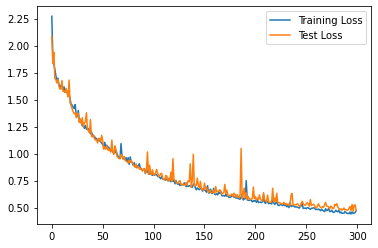

In [48]:
#Loss Curve
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = "Test Loss")
plt.legend()
plt.show()

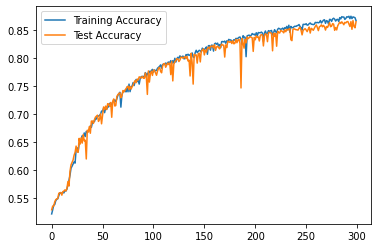

In [49]:
#accuracy Curve
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = "Test Accuracy")
plt.legend()
plt.show()

## 4.2 Evaluation

In [50]:
loss, accuracy = model.evaluate(X_test, y_test)

2366/2366 [==============================] - 4s 2ms/step - loss: 0.4752 - accuracy: 0.8655


##  4.3 Make Predictions

In [51]:
predictions = model.predict(X_test)

In [52]:
predictions

array([[9.89915371e-01, 5.47512718e-05, 1.65382703e-03, ...,
        4.60249936e-08, 1.37680054e-05, 2.93210292e-07],
       [2.67766609e-07, 4.52132520e-21, 6.82255261e-17, ...,
        1.19641516e-06, 1.12736576e-09, 1.30129614e-04],
       [8.50993514e-01, 1.98647920e-02, 2.70239031e-03, ...,
        4.36405495e-11, 3.59146579e-05, 5.81646054e-06],
       ...,
       [1.07491927e-04, 1.12555700e-03, 2.73813581e-04, ...,
        7.58910460e-07, 3.15824514e-06, 3.12536912e-07],
       [9.82406259e-01, 2.13745865e-03, 7.45538156e-03, ...,
        1.06380245e-10, 1.94254953e-05, 1.02338165e-08],
       [6.71121757e-04, 2.84359953e-03, 3.13955382e-03, ...,
        8.22061484e-05, 4.64988398e-06, 5.28043245e-08]], dtype=float32)